In [15]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os
# used for accessing url to download files
import urllib.request as urlreq

In [16]:
!pip install opencv-contrib-python --user

In [17]:

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [18]:
image = cv2.imread('../data/inputs/data/flickr2/fgs/9435356177_0037caecca_o.png')
print(image)
# Convert the image color to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect the face
rects = detector(gray, 1)
# Detect landmarks for each face
for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
# Convert it to the NumPy Array
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np

    # Display the landmarks
    for i, (x, y) in enumerate(shape):
    # Draw the circle to mark the keypoint 
        cv2.circle(image, (x, y), 3, (255, 0, 0), -1)


[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[177 169 205]
  [182 174 208]
  [185 178 210]
  ...
  [233 229 231]
  [233 229 231]
  [234 231 232]]

 [[174 166 209]
  [178 171 212]
  [182 174 213]
  ...
  [233 228 232]
  [234 229 232]
  [234 231 232]]

 [[170 162 211]
  [175 168 216]
  [180 172 217]
  ...
  [233 227 232]
  [234 229 232]
  [234 231 232]]]


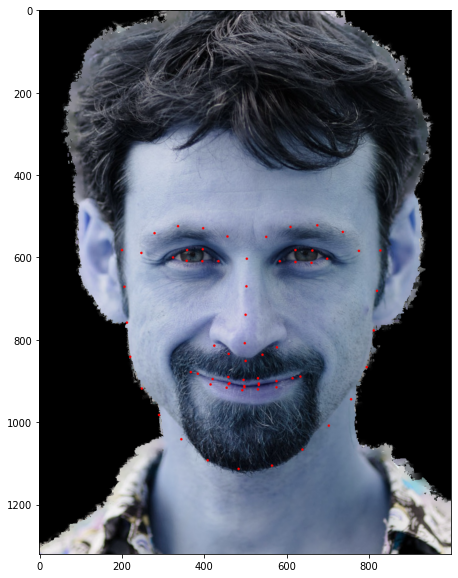

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [20]:
landmarkfile = open('../data/inputs/data/flickr2/landmarks/9435356177_0037caecca_o.lm')
landmarks = landmarkfile.read().splitlines()
landmarks = [(float(i.split(",")[0]),float(i.split(",")[1])) for i in landmarks]
for x in landmarks:
     cv2.circle(image, (int(x[0]), int(x[1])), 3, (0, 0, 255), -1)


# red is using dlib, blue is using from given data

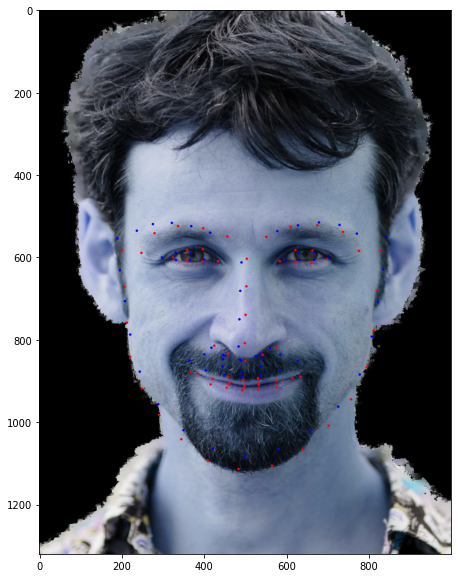

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(image)

#using opencv


In [22]:
# save face detection algorithm's url in haarcascade_url variable
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

# save face detection algorithm's name as haarcascade
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    # download file from url and save locally as haarcascade_frontalface_alt2.xml
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

File exists


In [23]:
# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(gray)

# Print coordinates of detected faces
print("Faces:\n", faces)


Faces:
 [[113 307 785 785]]


In [24]:
# save facial landmark detection model's url in LBFmodel_url variable
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

# save facial landmark detection model's name as LBFmodel
LBFmodel = "LFBmodel.yaml"

# check if file is in working directory
if (LBFmodel in os.listdir(os.curdir)):
    print("File exists")
else:
    # download picture from url and save locally as lbfmodel.yaml
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    print("File downloaded")

File exists


In [25]:
# create an instance of the Facial landmark Detector with the model
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

# Detect landmarks on "image_gray"
_, landmarks = landmark_detector.fit(gray, faces)

# print coordinates of detected landmarks
print("landmarks LBF\n", landmarks)

loading data from : LFBmodel.yaml
landmarks LBF
 (array([[[ 209.80829,  565.72864],
        [ 210.38885,  663.1735 ],
        [ 215.23572,  757.1046 ],
        [ 227.52563,  848.20123],
        [ 259.34964,  930.01965],
        [ 305.23676, 1002.7619 ],
        [ 365.78473, 1067.2026 ],
        [ 430.56824, 1117.3756 ],
        [ 503.6312 , 1130.954  ],
        [ 582.2433 , 1116.8169 ],
        [ 653.3478 , 1067.2697 ],
        [ 717.5689 , 1004.5422 ],
        [ 773.01917,  931.3527 ],
        [ 810.09875,  851.15656],
        [ 826.4098 ,  759.10815],
        [ 833.4086 ,  662.0914 ],
        [ 838.88947,  561.7606 ],
        [ 248.12411,  585.09735],
        [ 283.69794,  539.287  ],
        [ 341.49084,  521.25323],
        [ 403.65536,  526.6426 ],
        [ 462.53094,  547.723  ],
        [ 549.27844,  542.14795],
        [ 612.7756 ,  519.9359 ],
        [ 679.87384,  516.15405],
        [ 741.05975,  536.15674],
        [ 779.2017 ,  584.96027],
        [ 504.27805,  603.46936]

# red is using dlib, blue is using from given data,white using open cv

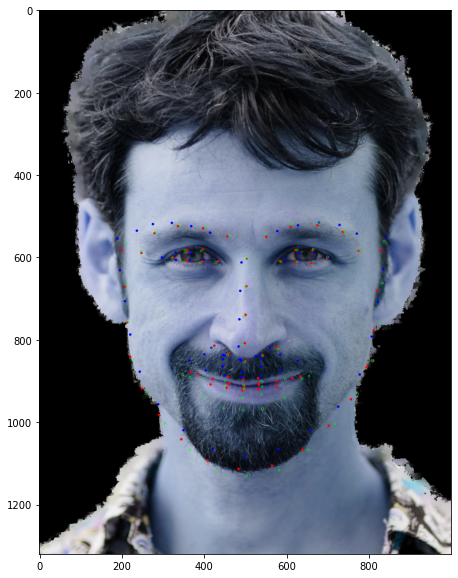

In [26]:
points =[]
for landmark in landmarks:
    for x,y in landmark[0]:
		# display landmarks on "image_cropped"
		# with white colour in BGR and thickness 1
        points.append((int(x), int(y)))
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 0), 1)
# plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(image)

<Figure size 720x720 with 0 Axes>

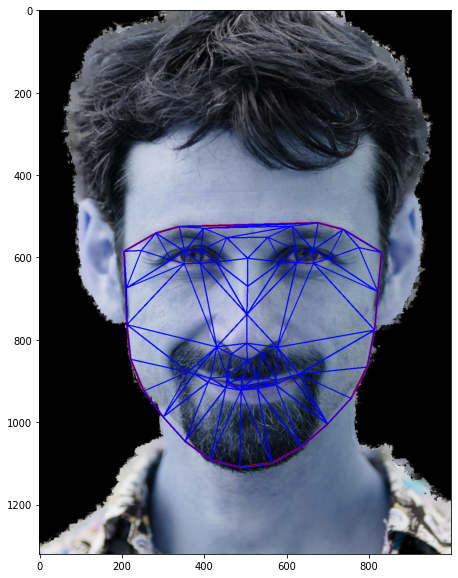

<Figure size 720x720 with 0 Axes>

In [27]:
img = cv2.imread('../data/inputs/data/flickr2/fgs/9435356177_0037caecca_o.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
# Loading Face landmarks detector
def detect_face(img_gray):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    face = detector(img_gray)[0]
    return face
def find_triangles(img_gray,face):
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        #cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask, convexhull, 255)
    face_only = cv2.bitwise_and(img, img, mask=mask)
    # Delaunay triangulation
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks_points)
    triangles = np.array(subdiv.getTriangleList(), dtype=np.int32)
    return triangles,landmarks_points,face_only,points
    

def plot_triangles(triangles,points):
    indexes_triangles = []
    for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 =index_pt1[0][0]
        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = index_pt2[0][0]
        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = index_pt3[0][0]
        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)
        cv2.line(img, pt1, pt2, (0, 0, 255), 2)
        cv2.line(img, pt2, pt3, (0, 0, 255), 2)
        cv2.line(img, pt1, pt3, (0, 0, 255), 2)
    return img ,indexes_triangles
triangles,landmarks_points,face_only,points = find_triangles(img_gray,detect_face(img_gray))
img ,indexes_triangles= plot_triangles(triangles,points)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.figure(figsize=(10,10))
#plt.imshow(face_only)



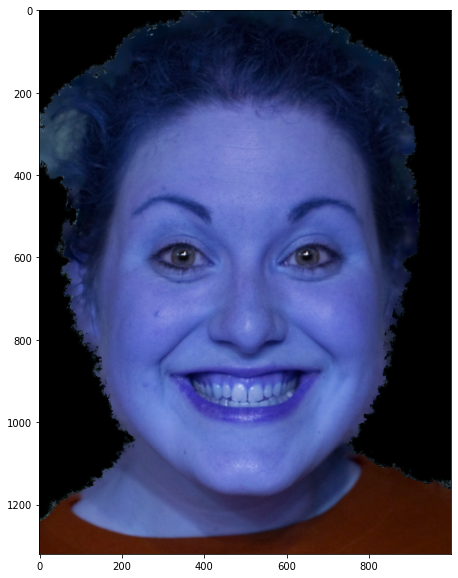

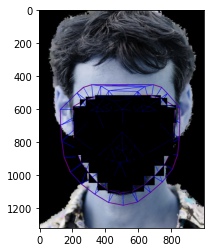

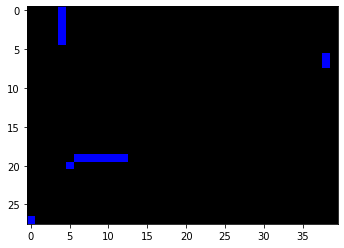

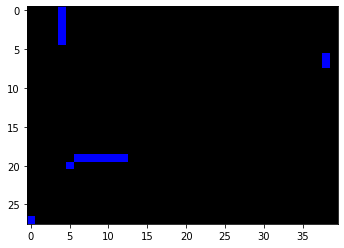

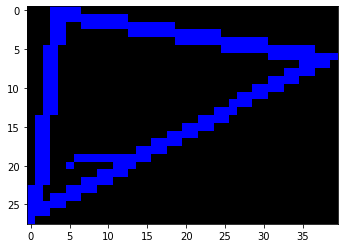

In [28]:
#Calculate affine transforms : So we have a set of 80 points in image 1, another set of 80 points in image 2 and a third set of 80 points in the morphed image. We also know the triangulation defined over these points. Pick a triangle in image 1 and the corresponding triangle in the morphed image and calculate the affine transform that maps the three corners of the triangle in image 1 to the three corners of the corresponding triangle in the morphed image. In OpenCV, this can be done using getAffineTransform . Calculate an affine transform for every pair of 149 triangles.
def applyaffineTransform(source ,srcTrinage,destTrinagle,size):
    #find the affine transform.
    warpMat = cv2.getAffineTransform(np.float32(srcTrinage), np.float32(destTrinagle))
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine(source, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return dst
    
def affine_all_triangels(img1,img2):
    img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(img_gray1)
    triangles,landmarks_points1,face_only,points = find_triangles(img_gray1,detect_face(img_gray1))
    img ,indexes_triangles= plot_triangles(triangles,points)
    img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    triangles2,landmarks_points2,face_only2,points2 = find_triangles(img_gray2,detect_face(img_gray2))
    img2 ,indexes_triangles2= plot_triangles(triangles2,points2)
    # Triangulation of both faces
    for triangle_index in indexes_triangles:
        # Triangulation of the first face
        tr1_pt1 = landmarks_points[triangle_index[0]]
        tr1_pt2 = landmarks_points[triangle_index[1]]
        tr1_pt3 = landmarks_points[triangle_index[2]]
        triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
        rect1 = cv2.boundingRect(triangle1)
        (x, y, w, h) = rect1
        cropped_triangle = img[y: y + h, x: x + w]
        cropped_tr1_mask = np.zeros((h, w), np.uint8)
        points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                        [tr1_pt2[0] - x, tr1_pt2[1] - y],
                        [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)
        cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
        cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                        mask=cropped_tr1_mask)
        cv2.line(img, tr1_pt1, tr1_pt2, (0, 0, 255), 2)
        cv2.line(img, tr1_pt3, tr1_pt2, (0, 0, 255), 2)
        cv2.line(img, tr1_pt1, tr1_pt3, (0, 0, 255), 2)
         # Triangulation of second face
        tr2_pt1 = landmarks_points2[triangle_index[0]]
        tr2_pt2 = landmarks_points2[triangle_index[1]]
        tr2_pt3 = landmarks_points2[triangle_index[2]]
        triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
        rect2 = cv2.boundingRect(triangle2)
        (x, y, w, h) = rect2
        cropped_triangle2 = img2[y: y + h, x: x + w]
        cropped_tr2_mask = np.zeros((h, w), np.uint8)
        points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
        cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
        cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                        mask=cropped_tr2_mask)
        cv2.line(img2, tr2_pt1, tr2_pt2, (0, 0, 255), 2)
        cv2.line(img2, tr2_pt3, tr2_pt2, (0, 0, 255), 2)
        cv2.line(img2, tr2_pt1, tr2_pt3, (0, 0, 255), 2)
        # Warp triangles
        points = np.float32(points)
        points2 = np.float32(points2)
        M = cv2.getAffineTransform(points, points2)
        warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
        img2[y: y + h, x: x + w] = warped_triangle
        """plt.imshow(warped_triangle)
        plt.show()
        plt.imshow(cropped_triangle)
        plt.show()
        plt.imshow(cropped_triangle2)"""
    return warped_triangle,cropped_triangle,cropped_triangle2,img2

img1 = cv2.imread('../data/inputs/data/flickr2/fgs/4583417472_ef8277ecef_o.png')
img2 = cv2.imread('../data/inputs/data/flickr2/fgs/9435356177_0037caecca_o.png')
warped_triangle,cropped_triangle,cropped_triangle2,img2 = affine_all_triangels(img1,img2)
plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(warped_triangle)
plt.show()
plt.imshow(cropped_triangle)
plt.show()
plt.imshow(cropped_triangle2)
    
     